Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [106]:
import random
import pandas as pd
import numpy as np

In [107]:
#creating dataset

wt = []
dsbda = []
ai = []
cc = []

for i in range(1200):
    wt.append(random.randint(0, 100))
    dsbda.append(random.randint(0, 100))
    ai.append(random.randint(0, 100))
    cc.append(random.randint(0, 100))

for i in range(100):
    wt.append(np.nan)
    dsbda.append(np.nan)
    ai.append(np.nan)
    cc.append(np.nan)

for i in range(100):
    wt.append(random.randint(100, 150))
    dsbda.append(random.randint(100, 150))
    ai.append(random.randint(100, 150))
    cc.append(random.randint(100, 150))

for i in range(100):
    wt.append(random.randint(-10, 0))
    dsbda.append(random.randint(-10, 0))
    ai.append(random.randint(-10, 0))
    cc.append(random.randint(-10, 0))


g = ['M','F']
gender = [g[random.randint(0,1)] for i in range(1500)]

div = ['TE-1','TE-2','TE-3','TE-4']
Class = [div[random.randint(0,3)] for i in range(1500)]

d = {'wt':wt,'dsbda':dsbda,'ai':ai,'cc':cc,'gender':gender,'class':Class}
df = pd.DataFrame(d)
df = df.sample(frac=1).reset_index(drop=1)
df

,wt,dsbda,ai,cc,gender,class
0,23.0,42.0,93.0,23.0,F,TE-3
1,90.0,79.0,47.0,25.0,F,TE-3
2,111.0,138.0,118.0,148.0,M,TE-2
3,97.0,41.0,49.0,42.0,M,TE-4
4,49.0,31.0,26.0,31.0,M,TE-2
...,...,...,...,...,...,...
1495,65.0,45.0,97.0,38.0,M,TE-4
1496,85.0,53.0,65.0,31.0,M,TE-2
1497,13.0,66.0,63.0,32.0,F,TE-4
1498,6.0,13.0,52.0,83.0,F,TE-3


In [108]:
df.skew()

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_12616/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


wt       0.366435
dsbda    0.413460
ai       0.372623
cc       0.369919
dtype: float64

In [109]:
df.describe()

,wt,dsbda,ai,cc
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,50.833571,50.087143,50.504286,50.861429
std,37.050322,36.822832,37.120594,36.637739
min,-10.000000,-10.000000,-10.000000,-10.000000
25%,21.000000,19.000000,19.000000,21.000000
50%,48.000000,48.000000,49.000000,48.000000
75%,80.000000,77.000000,77.000000,79.000000
max,150.000000,150.000000,149.000000,150.000000


In [110]:
#outliers
Q1= df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
print((Q1-(1.5*IQR)),(Q3+(1.5*IQR)))

wt      -67.5
dsbda   -68.0
ai      -68.0
cc      -66.0
dtype: float64 wt       168.5
dsbda    164.0
ai       164.0
cc       166.0
dtype: float64


In [111]:
((df <= (Q1-(1.5*IQR)))|(df >= (Q3+(1.5*IQR)))).sum()

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_12616/3348133730.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df <= (Q1-(1.5*IQR)))|(df >= (Q3+(1.5*IQR)))).sum()


ai        0
cc        0
class     0
dsbda     0
gender    0
wt        0
dtype: int64

In [112]:
df

,wt,dsbda,ai,cc,gender,class
0,23.0,42.0,93.0,23.0,F,TE-3
1,90.0,79.0,47.0,25.0,F,TE-3
2,111.0,138.0,118.0,148.0,M,TE-2
3,97.0,41.0,49.0,42.0,M,TE-4
4,49.0,31.0,26.0,31.0,M,TE-2
...,...,...,...,...,...,...
1495,65.0,45.0,97.0,38.0,M,TE-4
1496,85.0,53.0,65.0,31.0,M,TE-2
1497,13.0,66.0,63.0,32.0,F,TE-4
1498,6.0,13.0,52.0,83.0,F,TE-3


In [113]:
outliers = []
for i in range(len(df)):
    for col in df:
        if str(df[col].dtype)!='object':
            if (df[col].iloc[i] <= (Q1[col]-(1.5*IQR[col]))) or (df[col].iloc[i] >= (Q3[col]+(1.5*IQR[col]))):
                outliers.append(i)

df = df.drop(list(set(outliers)),axis = 0)
df = df.reset_index()
df=df.drop('index',axis =1)
df

,wt,dsbda,ai,cc,gender,class
0,23.0,42.0,93.0,23.0,F,TE-3
1,90.0,79.0,47.0,25.0,F,TE-3
2,111.0,138.0,118.0,148.0,M,TE-2
3,97.0,41.0,49.0,42.0,M,TE-4
4,49.0,31.0,26.0,31.0,M,TE-2
...,...,...,...,...,...,...
1495,65.0,45.0,97.0,38.0,M,TE-4
1496,85.0,53.0,65.0,31.0,M,TE-2
1497,13.0,66.0,63.0,32.0,F,TE-4
1498,6.0,13.0,52.0,83.0,F,TE-3


In [114]:
df.skew()

C:\Users\ABHISH~1\AppData\Local\Temp/ipykernel_12616/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


wt       0.366435
dsbda    0.413460
ai       0.372623
cc       0.369919
dtype: float64

-10.0

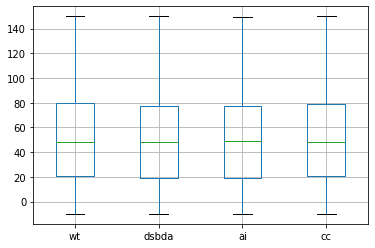

In [115]:
df.boxplot()
min(df['dsbda'])

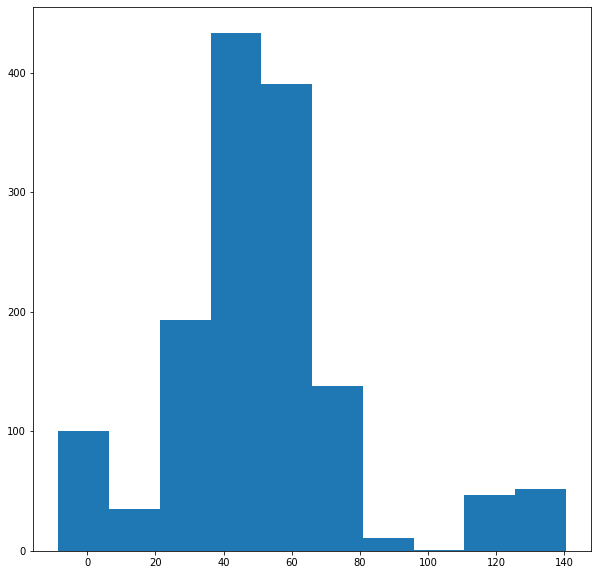

,wt,dsbda,ai,cc,percentage,class_TE-1,class_TE-2,class_TE-3,class_TE-4,gender_F,gender_M
0,0.20625,0.32500,0.647799,0.20625,0.360738,0.0,0.0,1.0,0.0,1.0,0.0
1,0.62500,0.55625,0.358491,0.21875,0.461409,0.0,0.0,1.0,0.0,1.0,0.0
2,0.75625,0.92500,0.805031,0.98750,0.921141,0.0,1.0,0.0,0.0,0.0,1.0
3,0.66875,0.31875,0.371069,0.32500,0.441275,0.0,0.0,0.0,1.0,0.0,1.0
4,0.36875,0.25625,0.226415,0.25625,0.286913,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1495,0.46875,0.34375,0.672956,0.30000,0.468121,0.0,0.0,0.0,1.0,0.0,1.0
1496,0.59375,0.39375,0.471698,0.25625,0.449664,0.0,1.0,0.0,0.0,0.0,1.0
1497,0.14375,0.47500,0.459119,0.26250,0.348993,0.0,0.0,0.0,1.0,1.0,0.0
1498,0.10000,0.14375,0.389937,0.58125,0.315436,0.0,0.0,1.0,0.0,1.0,0.0


In [116]:
from sklearn.preprocessing import MinMaxScaler

df['percentage'] = ((df['wt']+df['dsbda']+df['cc']+df['ai']) /4)
df
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(df['percentage'])
plt.show()
df.isnull().sum()
for col in df.select_dtypes(include = "number"):
    df[col].fillna(df[col].mean(),inplace = True)
df.isnull().sum()
df = pd.get_dummies(df, columns=["class",'gender'])
df
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns = df.columns)
df

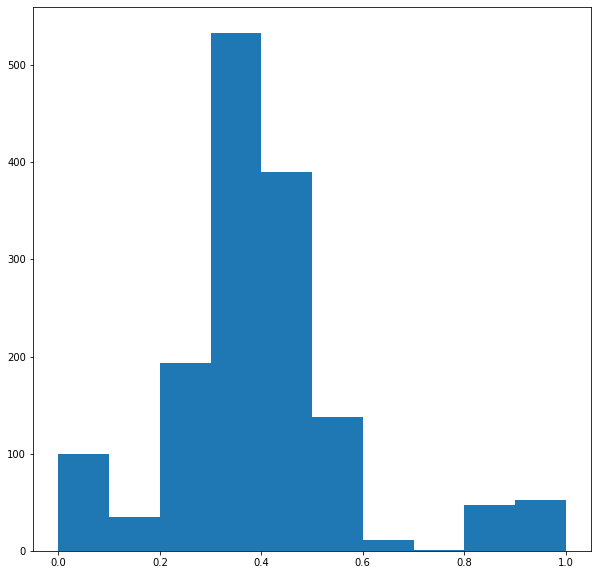

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.hist(df['percentage'])
plt.show()